# Análisis Exploratorio de Datos sobre los pronósticos del clima de The Weather Channel

### Abstract

En el presente análisis exploratorio se examinó el pronóstico de 15 días de The Weather Channel con el fin de plasmar la precisión con la que se predice el clima y las relaciones entre distintos parámetros. Se exploraron las distribuciones de los pronosticos climatológicas con análisis visuales, cuyos resultados ofrecen orientación a futuras investigaciones.

## 1. Introducción

### The Weather Channel

<img src="Logo.png" width="300">

The **Weather Channel** es una cadena estadounidense de pronósticos del tiempo lanzada en 1982. Su información proviene de **Weather Underground**, que utiliza el Servicio Meteorológico Nacional del gobierno federal de los Estados Unidos (NWS) y de más de 250 000 estaciones meteorológicas personales (PWS).

Este análisis se enfocó en un conjunto de datos que abarca un período de tiempo específico, proporcionando detalles sobre la temperatura, viento, lluvia, humedad, rayos UV, horas de salida y puesta del sol y luna, pronóstico general y otras características relevantes. Durante un periodo de 12 días comprendidos entre el 02/08/2023 y el 13/08/2023 se almacenaron las predicciones meteorológicas para 15 días futuros. 

El objetivo principal consistió en obtener una visión del cambio en las predicciones del clima, la certeza de los pronósticos e identificar patrones y probables relaciones entre elementos del clima.

## 2. Exploración de datos

#### Instalación de bibliotecas

In [78]:
pip install numpy

In [79]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [436]:
df = pd.read_csv("./Clima.csv")


In [84]:
df.describe()

,id,temperatura_maxima,temperatura_minima,probabilidad_lluvia,viento_dia,viento_noche,humedad_dia_porcentaje,humedad_noche_porcentaje
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,90.500000,38.861111,25.483333,7.200000,15.322222,17.833333,25.116667,29.111111
std,52.105662,1.758503,1.043602,6.093682,3.269387,3.683725,4.640452,5.330306
min,1.000000,36.000000,24.000000,0.000000,8.000000,10.000000,13.000000,17.000000
25%,45.750000,38.000000,25.000000,3.000000,14.000000,16.000000,23.000000,26.000000
50%,90.500000,39.000000,25.000000,6.000000,15.000000,17.500000,25.000000,29.000000
75%,135.250000,40.000000,26.000000,10.250000,17.000000,20.000000,28.000000,32.000000
max,180.000000,43.000000,28.000000,24.000000,29.000000,31.000000,37.000000,44.000000


### Variación en las predicciones metereológicas para el mismo día

Como cada día se obtuvo el pronóstico de los siguientes 15 días, por lo que unos días tienen más predicciones que otros. Para comparar el cambio entre los pronóstico de una fecha se utilizaron aquellos con 10 predicciones o más.

#### Temperaturas

- A mayor número de predicciones menos puntos coinciden entre ellos. 
- Para el viernes 11 y el sábado 12 los pronósticos son más dispersos con variaciones de hasta 8°C, pero hay días con valores más concisos como el miércoles 16 y el viernes 18 donde el cambio es de 1°C.

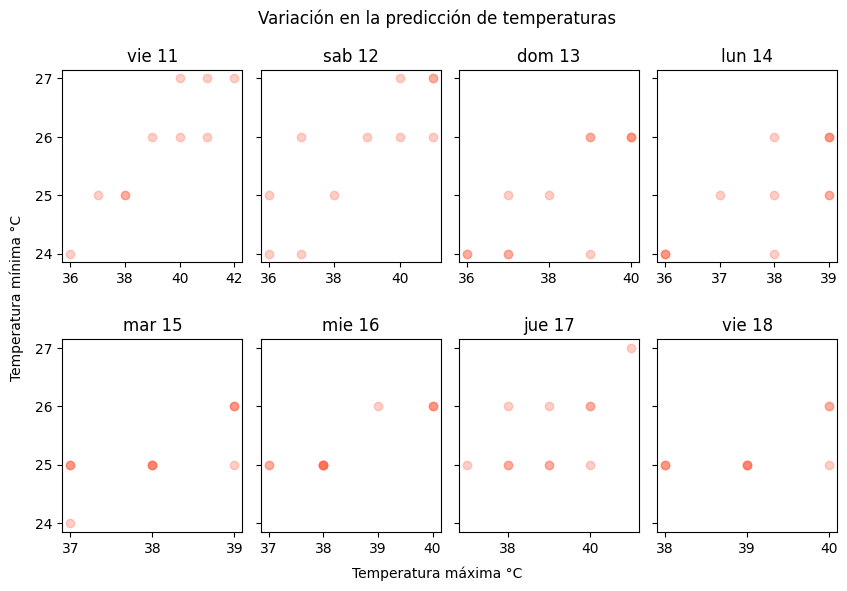

In [438]:
dias = ["mie 02","jue 03","vie 04","sab 05","dom 06","lun 07", "mar 08", "mie 09", "jue 10", "vie 11", "sab 12", "dom 13", "lun 14","mar 15", "mie 16", "jue 17", "vie 18", "sab 19", "dom 20", "lun 21", "mar 22", "mie 23", "jue 24", "vie 25", "sab 26", "dom 27"]
a, b = 0, 0
fig = plt.figure(figsize=(10,6))
gs = fig.add_gridspec(2, 4, hspace=0.4, wspace=0.1)
axs = gs.subplots(sharey='row')
fig.suptitle("Variación en la predicción de temperaturas")
fig.text(0.5, 0.04, "Temperatura máxima °C", ha='center', va='center')
fig.text(0.08, 0.5, "Temperatura mínima °C", ha='center', va='center', rotation='vertical')
for dia in dias:
    lista = df[df["fecha"]==dia]
    if len(lista)>=10:
        axs[a,b].scatter(lista["temperatura_maxima"], lista["temperatura_minima"], color='tomato', alpha=0.3)
        axs[a,b].set_title(f"{dia}")
        if b==3:
            b=0
            a+=1
        else:
            b+=1


#### Vientos

- En los pronósticos del viento suele variar la dirección de donde provienen más que su magnitud, aunque hay excepciones.
- En general, se presenta una diferencia en las magnitudes desde 5 km/h hasta 15 km/h y desde una hasta siete direcciones distintas.

##### Viento en el día

- Los días menos precisos en cuanto a dirección son el sábado 12 y el domingo 13, aunque la magnitud del viento se mantiene en un rango de 10 km/h a 20 km/h.
- En cuanto a magnitud del viento, el lunes 14 y martes 15 presentan mayor variación, pero alternan poco su dirección.



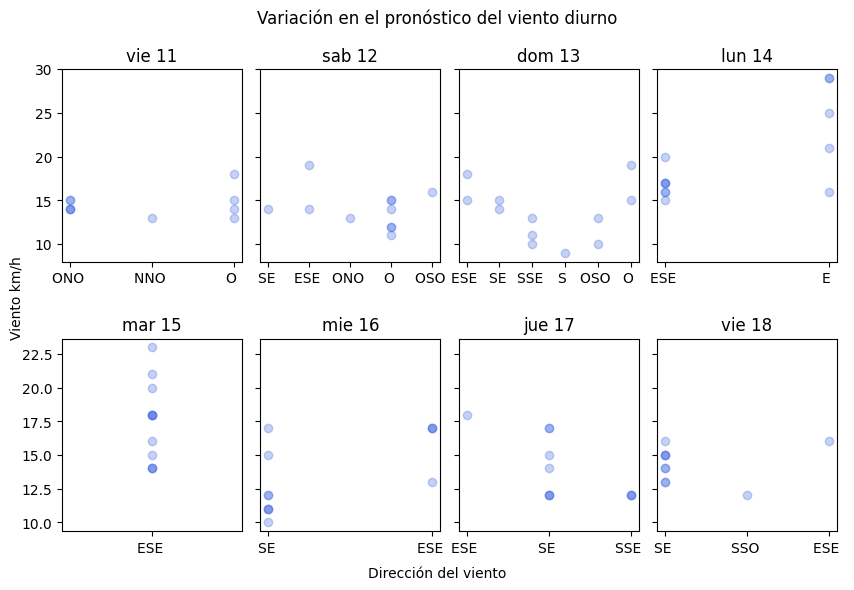

In [409]:
dias = ["mie 02","jue 03","vie 04","sab 05","dom 06","lun 07", "mar 08", "mie 09", "jue 10", "vie 11", "sab 12", "dom 13", "lun 14","mar 15", "mie 16", "jue 17", "vie 18", "sab 19", "dom 20", "lun 21", "mar 22", "mie 23", "jue 24", "vie 25", "sab 26", "dom 27"]
a, b = 0, 0
fig = plt.figure(figsize=(10,6))
gs = fig.add_gridspec(2, 4, hspace=0.4, wspace=0.1)
axs = gs.subplots(sharey='row')
fig.suptitle("Variación en el pronóstico del viento diurno")
fig.text(0.5, 0.04, "Dirección del viento", ha='center', va='center')
fig.text(0.08, 0.5, "Viento km/h", ha='center', va='center', rotation='vertical')
for dia in dias:
    lista = df[df["fecha"]==dia]
    if len(lista)>=10:
        axs[a,b].scatter(lista["direccion_viento_dia"], lista["viento_dia"], color='royalblue', alpha=0.3)
        axs[a,b].set_title(f"{dia}")
        if b==3:
            b=0
            a+=1
        else:
            b+=1

##### Viento en la noche

- El lunes 14, martes 15 y miércoles 16 presentan mayor dispersión en la magnitud del viento.
- Los días con mayor variedad de direcciones son el sabado 12, domingo 13 y viernes 18 con 5, 7 y 5 direcciones distintas respectivamente.

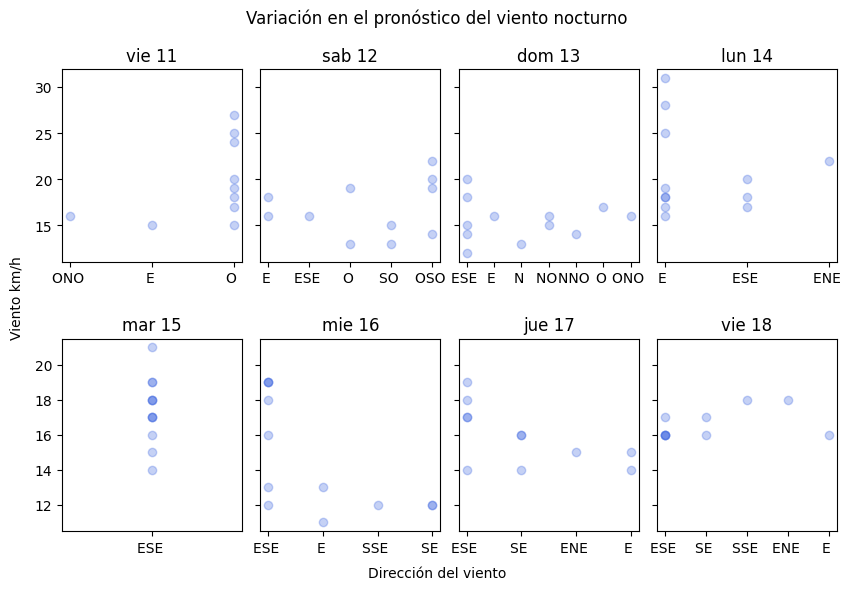

In [439]:
dias = ["mie 02","jue 03","vie 04","sab 05","dom 06","lun 07", "mar 08", "mie 09", "jue 10", "vie 11", "sab 12", "dom 13", "lun 14","mar 15", "mie 16", "jue 17", "vie 18", "sab 19", "dom 20", "lun 21", "mar 22", "mie 23", "jue 24", "vie 25", "sab 26", "dom 27"]
a, b = 0, 0
fig = plt.figure(figsize=(10,6))
gs = fig.add_gridspec(2, 4, hspace=0.4, wspace=0.1)
axs = gs.subplots(sharey='row')
fig.suptitle("Variación en el pronóstico del viento nocturno")
fig.text(0.5, 0.04, "Dirección del viento", ha='center', va='center')
fig.text(0.08, 0.5, "Viento km/h", ha='center', va='center', rotation='vertical')
for dia in dias:
    lista = df[df["fecha"]==dia]
    if len(lista)>=10:
        axs[a,b].scatter(lista["direccion_viento_noche"], lista["viento_noche"], color='royalblue', alpha=0.3)
        axs[a,b].set_title(f"{dia}")
        if b==3:
            b=0
            a+=1
        else:
            b+=1

#### Humedad

- Las predicciones del porcentaje de humedad son muy dispersas, presentan una diferencia desde 10% hasta el 20%. 
- Se observa un tendencia lineal positiva, lo que indica un aumento en la humedad diurna y nocturna. Adecuando al cambio de estación.

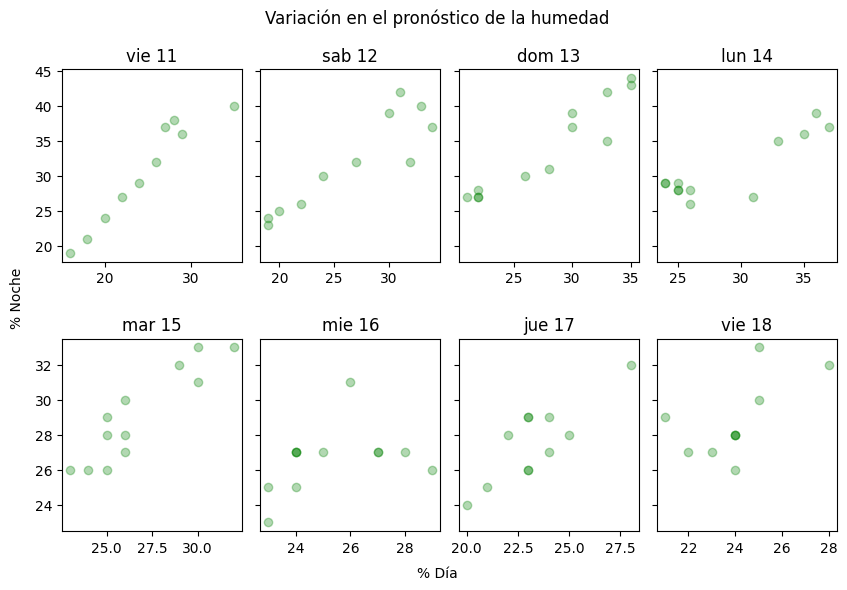

In [440]:
dias = ["mie 02","jue 03","vie 04","sab 05","dom 06","lun 07", "mar 08", "mie 09", "jue 10", "vie 11", "sab 12", "dom 13", "lun 14","mar 15", "mie 16", "jue 17", "vie 18", "sab 19", "dom 20", "lun 21", "mar 22", "mie 23", "jue 24", "vie 25", "sab 26", "dom 27"]
a, b = 0, 0
fig = plt.figure(figsize=(10,6))
gs = fig.add_gridspec(2, 4, hspace=0.4, wspace=0.1)
axs = gs.subplots(sharey='row')
fig.suptitle("Variación en el pronóstico de la humedad")
fig.text(0.5, 0.04, "% Día", ha='center', va='center')
fig.text(0.08, 0.5, "% Noche", ha='center', va='center', rotation='vertical')
for dia in dias:
    lista = df[df["fecha"]==dia]
    if len(lista)>=10:
        axs[a,b].scatter(lista["humedad_dia_porcentaje"], lista["humedad_noche_porcentaje"], color="g", alpha=0.3)
        axs[a,b].set_title(f"{dia}")
        if b==3:
            b=0
            a+=1
        else:
            b+=1

#### Movimientos del sol

- Solo los días 5, 8, 11 y 22 de agosto presentaron cambio en la predicción de la hora del amanecer y la puesta del sol. Todos los demás días coincidieron.
- Las variaciones sobre la hora en la que amanece y se pone el sol fueron mínimas. Las que se presentaron fueron por diferencia de un minuto.

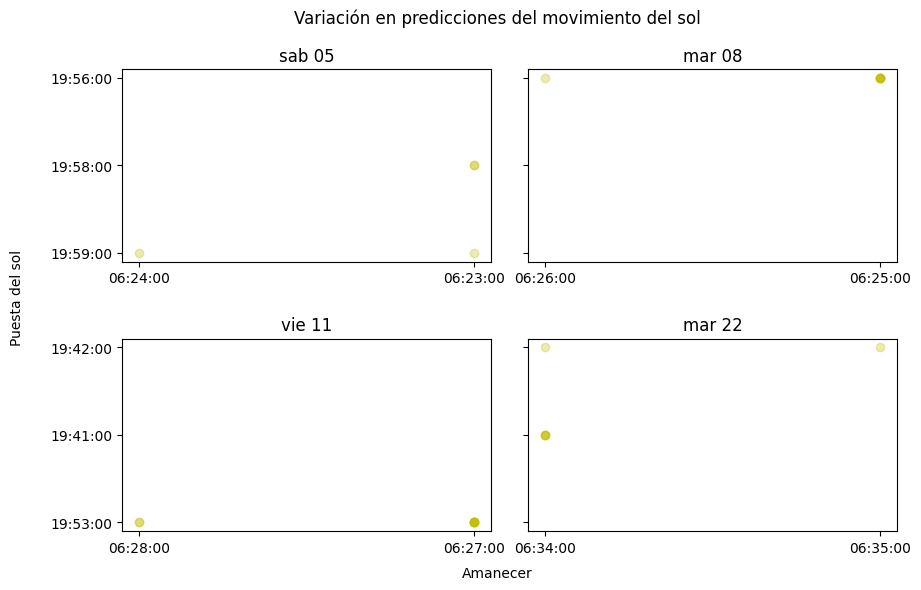

In [441]:
dias_variacion_amanecer =["sab 05", "mar 08", "vie 11", "mar 22"]
a, b = 0, 0
fig = plt.figure(figsize=(10,6))
gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.1)
axs = gs.subplots(sharey='row')
fig.suptitle("Variación en predicciones del movimiento del sol")
fig.text(0.5, 0.04, "Amanecer", ha='center', va='center')
fig.text(0.02, 0.5, "Puesta del sol", ha='center', va='center', rotation='vertical')
for dia in dias_variacion_amanecer:
    lista = df[df["fecha"]==dia]
    axs[a,b].scatter(lista["amanecer"], lista["puesta_solar"], color="y", alpha=0.3)
    axs[a,b].set_title(f"{dia}")
    if b==1:
        b=0
        a+=1
    else:
        b+=1

#### Movimientos de la luna

- La luna presentó 9 días con variación en la hora de su salida y puesta.
- Las variaciones fueron de un minuto y predominaron en la hora de puesta lunar.

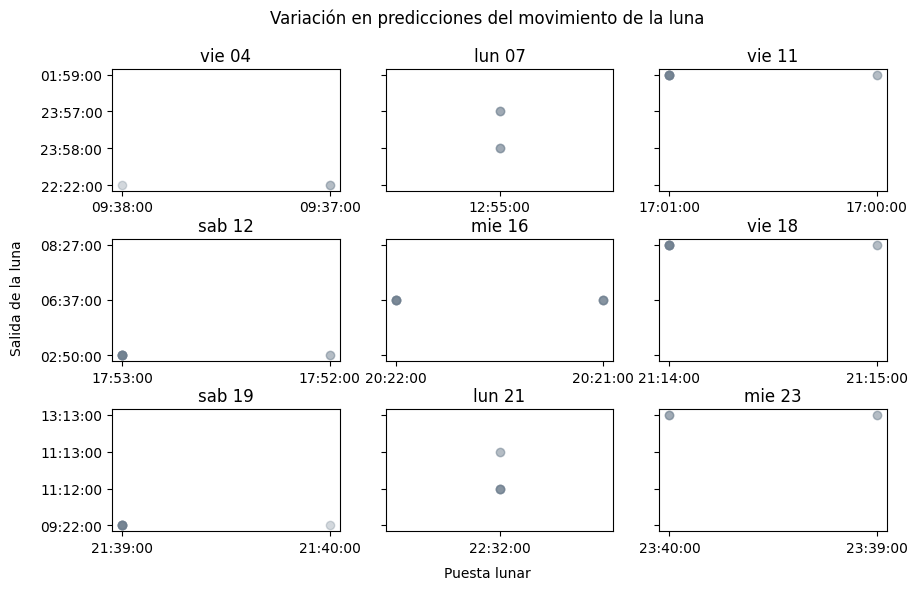

In [442]:
dias_variacion_luna =["vie 04" ,"lun 07", "vie 11", "sab 12","mie 16", "vie 18", "sab 19", "lun 21", "mie 23"]
a, b = 0, 0
fig = plt.figure(figsize=(10,6))
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.2)
axs = gs.subplots(sharey='row')
fig.suptitle("Variación en predicciones del movimiento de la luna")
fig.text(0.5, 0.04, "Puesta lunar", ha='center', va='center')
fig.text(0.03, 0.5, "Salida de la luna", ha='center', va='center', rotation='vertical')
for dia in dias_variacion_luna:
    lista = df[df["fecha"]==dia]
    axs[a,b].scatter(lista["puesta_lunar"], lista["salida_lunar"], color='slategray', alpha=0.3)
    axs[a,b].set_title(f"{dia}")
    if b==2:
        b=0
        a+=1
    else:
        b+=1

### Pronostico general

- Predominaron los días con sol.
- Casi la mitad de los días entre el miércoles 2 de agosto y el domingo 27 de agosto fueron mayormente soleados.
- Menos del 40% de los días fueron parcialmente nublados.

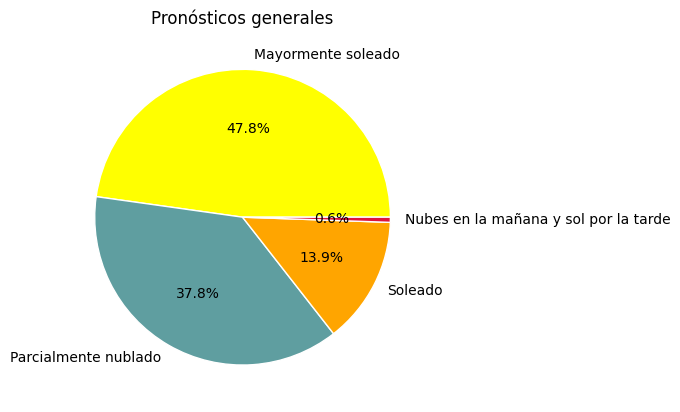

In [92]:
etiquetas=["Mayormente soleado","Parcialmente nublado","Soleado", "Nubes en la mañana y sol por la tarde"]
colores=["yellow","cadetblue","orange","crimson"]
plt.pie(df['pronostico'].value_counts(),labels=etiquetas,colors=colores,autopct='%.1f%%',wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
plt.title('Pronósticos generales')
#plt.legend(title = "Pronósticos:", loc='best')
plt.show()


### Temperatura máxima y rayos UV

- El índice de rayos UV fue extremo con temperaturas más altas.
- Para valores al tope del índice las temperaturas fueron ligeramente menos altas.

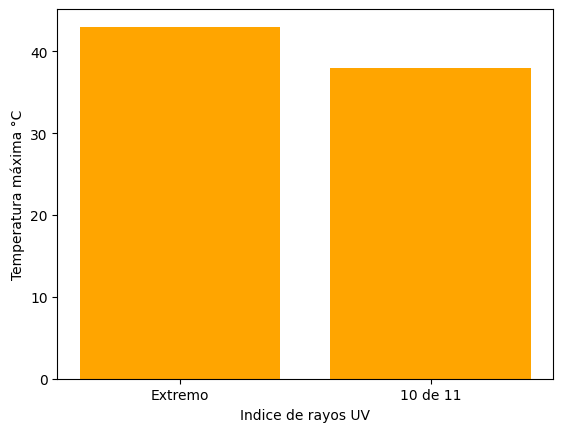

In [281]:
plt.bar(df["indice_UV_dia"],df["temperatura_maxima"],color="orange")
plt.xlabel("Indice de rayos UV")
plt.ylabel("Temperatura máxima °C")
plt.show()

#### Índice de rayos UV: Extremo

- El pronóstico general de los días con más rayos UV fue variado.

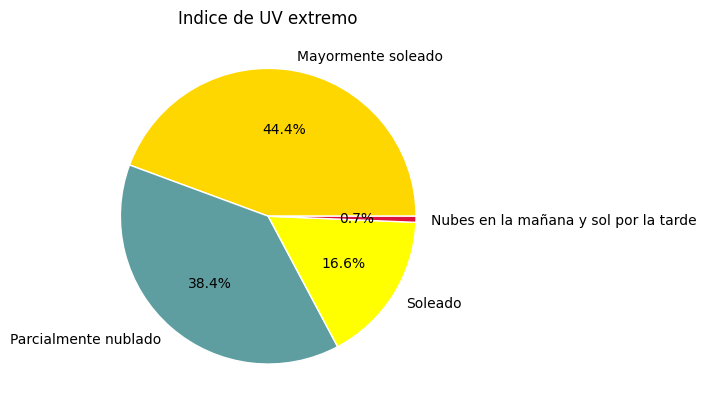

In [446]:
mayor_sol = df[df["indice_UV_dia"]=="Extremo"]
etiquetas=["Mayormente soleado","Parcialmente nublado","Soleado", "Nubes en la mañana y sol por la tarde"]
colores=["gold","cadetblue","yellow","crimson"]
plt.pie(mayor_sol['pronostico'].value_counts(),labels=etiquetas,colors=colores,autopct='%.1f%%',wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
plt.title("Indice de UV extremo")
#plt.legend(title = "Pronósticos:", loc='best')
plt.show()

#### Índice de rayos UV: 10 de 11

- Los días con menor índice de rayos UV fueron parcialmente nublados y no soleados en su totalidad, es decir hubo presencia de nubes.

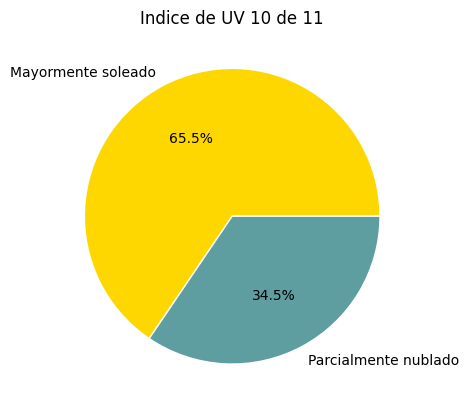

In [444]:
medio_sol = df[df["indice_UV_dia"]=="10 de 11"]
etiquetas=["Mayormente soleado","Parcialmente nublado",]
colores=["gold","cadetblue"]
plt.pie(medio_sol['pronostico'].value_counts(),colors=colores,labels=etiquetas,autopct='%.1f%%',wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
plt.title('Indice de UV 10 de 11')
#plt.legend(title = "Pronósticos:", loc='best')
plt.show()

### Temperatura mínima, viento y probabilidad de lluvia

- Se observa una distribución cragada hacia la izquierda.
- Se indica que a menor temperatura mayor probabilidad de lluvia. 

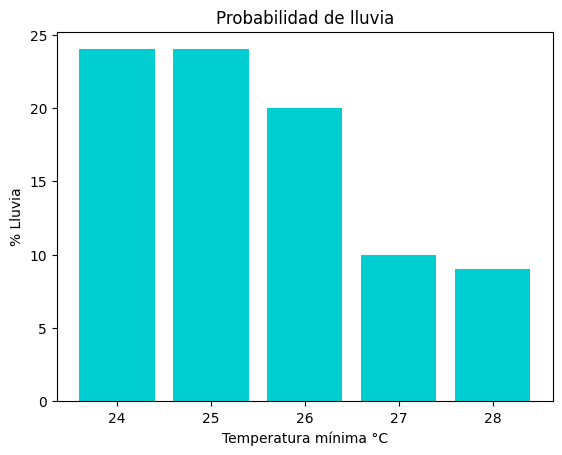

In [456]:
plt.bar(df["temperatura_minima"], df["probabilidad_lluvia"], color="darkturquoise")
plt.title("Probabilidad de lluvia")
plt.ylabel("% Lluvia")
plt.xlabel("Temperatura mínima °C")
plt.show()

- Las temperaturas mínimas corresponden a la noche y su distribución es levemente mayor a la izquierda. Lo que indica que a menor temperatura se presenta mayor viento.

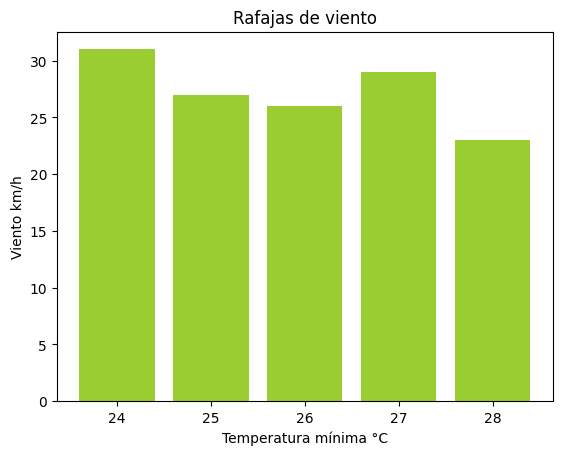

In [457]:
plt.bar(df["temperatura_minima"], df["viento_noche"],color="yellowgreen")
plt.ylabel("Viento km/h")
plt.title("Rafajas de viento")
plt.xlabel("Temperatura mínima °C")
plt.show()

### Probabilidad de lluvia y humedad

- Se muestra una relación de aumento entre la humedad y la probabilidad de lluvia tanto en el día como en la noche.
- Se observa mayor probabilidad de lluvia en la noche, debido a un mayor porcentaje de humedad.

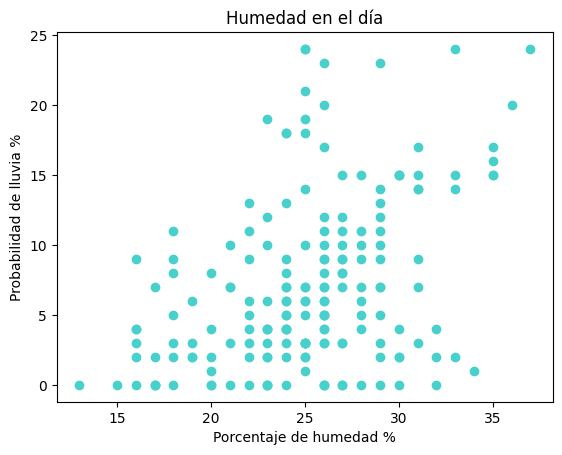

In [275]:
plt.scatter(df["humedad_dia_porcentaje"],df["probabilidad_lluvia"],color="mediumturquoise")
plt.title("Humedad en el día")
plt.xlabel("Porcentaje de humedad %")
plt.ylabel("Probabilidad de lluvia %")
plt.show()

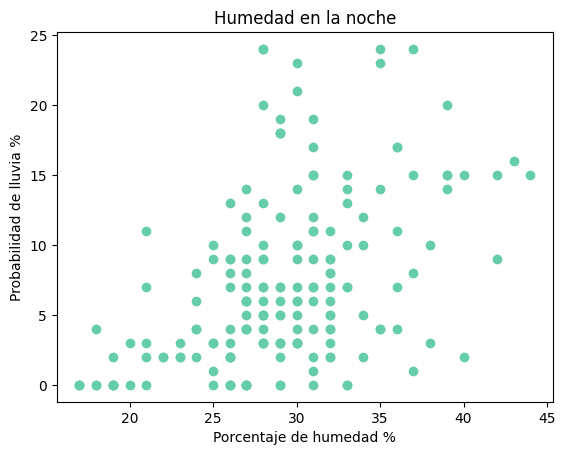

In [273]:
plt.scatter(df["humedad_noche_porcentaje"],df["probabilidad_lluvia"],color="mediumaquamarine")
plt.title("Humedad en la noche")
plt.xlabel("Porcentaje de humedad %")
plt.ylabel("Probabilidad de lluvia %")
plt.show()

### Viento

- Se observa mayor variación en la dirección que en los km/h, los días con mayor concordancia tienen menor cantidad de datos.
- Las predicciones del viento entre el domingo 06 y sabado 19, presentan mayores cambios entre sí tanto en dirección como en magnitud.
- En la noche las rafagas de viento son mayores que en el día.

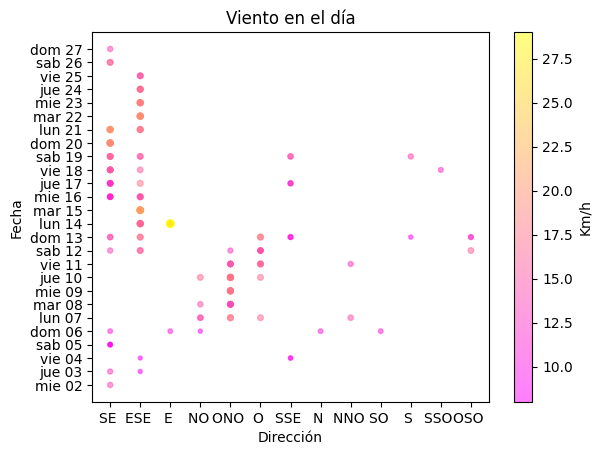

In [264]:
colors =df["viento_dia"]
sizes = df["viento_dia"]
plt.scatter(df["direccion_viento_dia"],df["fecha"],c=colors,s=sizes,alpha=0.5,cmap="spring")
plt.title("Viento en el día")
plt.ylabel("Fecha")
plt.xlabel("Dirección")
plt.colorbar(label="Km/h")
plt.show()

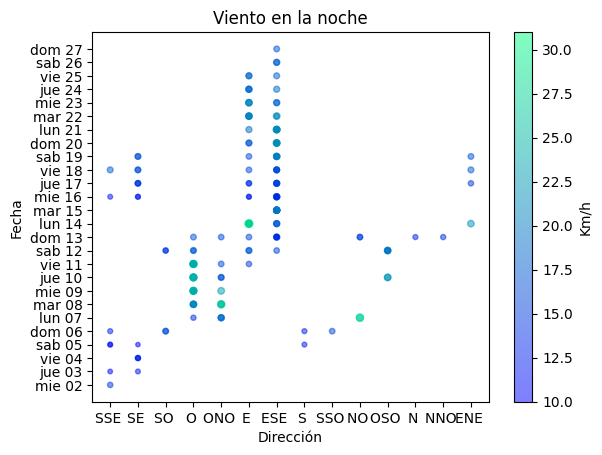

In [266]:
colors =df["viento_noche"]
sizes = df["viento_noche"]
plt.scatter(df["direccion_viento_noche"],df["fecha"],c=colors,s=sizes,alpha=0.5,cmap="winter")
plt.title("Viento en la noche")
plt.ylabel("Fecha")
plt.xlabel("Dirección")
plt.colorbar(label="Km/h")
plt.show()

### Amanecer

- Con el transcurso del tiempo amanece más tarde debido a el cambio de estación.

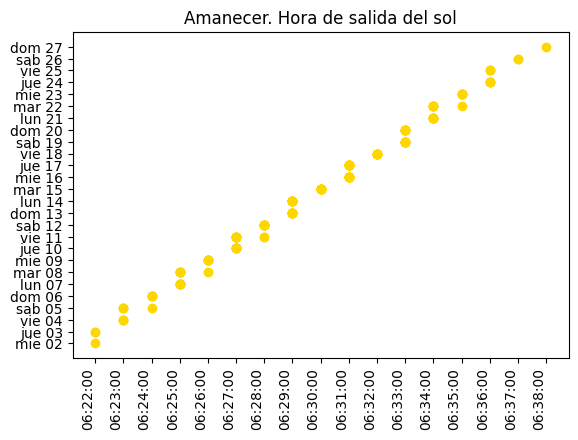

In [252]:
plt.scatter(df["amanecer"],df["fecha"],c="gold")
plt.title("Amanecer. Hora de salida del sol")
plt.gcf().autofmt_xdate(rotation=90)
plt.show()

### Fase lunar

- Parte del ciclo lunar fue almacenada.

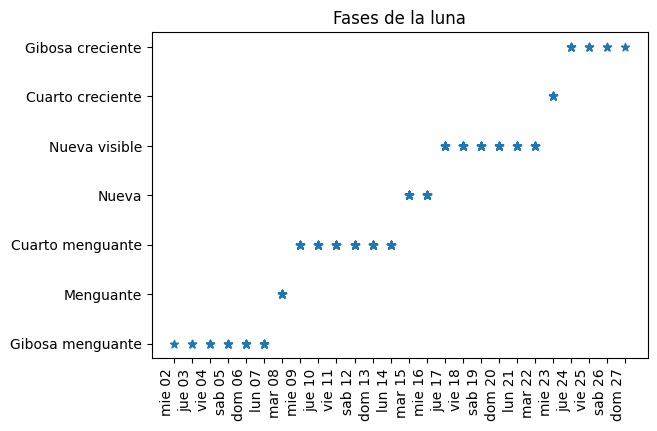

In [461]:
plt.scatter(df["fecha"],df["fase_lunar"], marker="*")
plt.title("Fases de la luna")
plt.gcf().autofmt_xdate(rotation=90)
plt.show()

## 3.Conclusiones

El análisis exploratorio de las predicciones climáticas de **The Weather Channel** indica que los pronósticos a futuro presentan más un rango de predicciones, es decir varias posibilidades, debido a las discrepancias entre los pronósticos de una misma fecha. Esto ocurre con la mayoría de los parámetros consultados, sin embargo hay valores muy consisos como la hora de salida y puesta del sol y la luna. Aún así, con el aproximado de las predicciones se observaron tendencias climáticas esperadas que señalan la transición de verano a otoño.

El clima es influenciado por muchos factores, por lo que estos resultados proporcionan una visión de la precisión con la que los pronósticos metereológicos predicen el clima.  Una predicción del tiempo a cinco días es tan fiable como una predicción a tres días, pero una predicción a quince días presenta mayor variabilidad.

### Referencias

[1] IBM Business, «The Weather Channel,» Pronóstico para 10 días [En línea]. Available: https://weather.com/es-MX/tiempo/10dias/l/07b1a6559b162903a7316ea44b2c6b95fa68b184212c4dad27fb2a430eff71a9.

[2] CIIFEN, «ciifen.org,» 2022. Pronósticos Climáticos [En línea]. Available: https://ciifen.org/pronosticos-climaticos/#.

[3] Weather Underground, «Wunderground,» [En línea]. Available: https://www.wunderground.com/.
